 # Power Load Prediction for West Zone - EDA (Quarterly)

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [8]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_83335/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [9]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [10]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [11]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [12]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [13]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity']].copy() 

In [14]:
power_data_west_mod.head()

,end,demand,temp,humidity
0,2019-01-29 00:15:00,844.8,54.0,21
1,2019-01-29 00:30:00,841.6,54.0,21
2,2019-01-29 00:45:00,832.0,54.0,21
3,2019-01-29 01:00:00,848.0,54.0,21
4,2019-01-29 01:15:00,812.8,55.0,21


In [15]:
power_data_west_mod.describe()

,demand,temp,humidity
count,104596.000000,104588.00000,104608.000000
mean,1238.634456,67.39232,52.635401
std,302.399419,16.59371,22.815913
min,0.000000,29.00000,3.000000
25%,1008.000000,54.00000,34.000000
50%,1232.000000,66.00000,49.000000
75%,1472.000000,79.00000,70.000000
max,2124.800000,114.00000,100.000000


In [16]:
power_data_west_mod.shape

(104608, 4)

In [21]:
power_data_west_qtly = power_data_west_mod.resample('Q', on='end').agg({'demand':'sum', 'temp':'mean', 'humidity':'mean'})

In [22]:
power_data_west_qtly['end'] = power_data_west_qtly.index.values

In [26]:
power_data_west_qtly['quarter'] = power_data_west_qtly['end'].dt.quarter

In [29]:
power_data_west_qtly.describe()

,demand,temp,humidity,quarter
count,1.300000e+01,13.000000,13.000000,13.000000
mean,9.965862e+06,66.105292,53.331253,2.384615
std,3.207562e+06,12.706163,10.254680,1.192928
min,2.618046e+06,51.747030,37.459805,1.000000
25%,8.979346e+06,53.864393,45.836081,1.000000
50%,1.077279e+07,60.769361,55.716690,2.000000
75%,1.218011e+07,73.382440,59.303342,3.000000
max,1.351031e+07,84.757926,71.088725,4.000000


In [28]:
power_data_west_qtly

,demand,temp,humidity,end,quarter
end,,,,,
2019-03-31,5004710.40,53.864393,71.088725,2019-03-31,1
2019-06-30,10772790.41,72.402816,55.716690,2019-06-30,2
2019-09-30,12180112.00,82.823256,42.513474,2019-09-30,3
2019-12-31,8979345.58,58.611979,47.412138,2019-12-31,4
2020-03-31,7780897.60,53.278732,61.558837,2020-03-31,1
2020-06-30,9817627.19,72.590087,57.026213,2020-06-30,2
2020-09-30,13510313.60,84.310009,39.112885,2020-09-30,3
2020-12-31,11457713.60,60.769361,54.671422,2020-12-31,4
2021-03-31,10223300.79,53.159527,65.707865,2021-03-31,1


dataset.kW.plot()

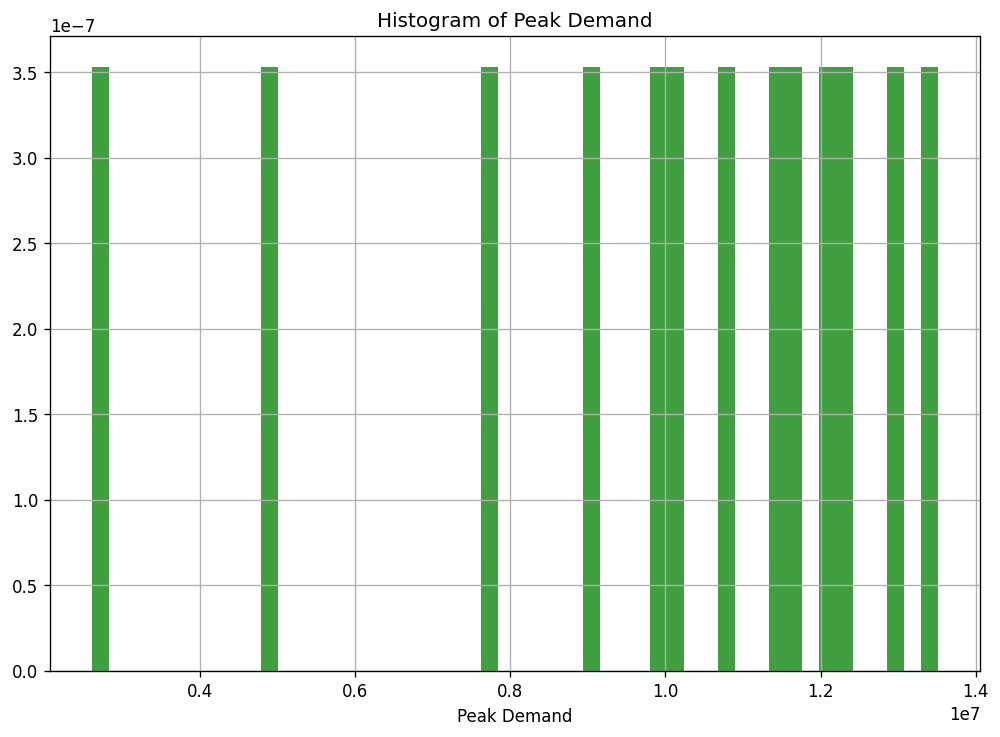

In [30]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_qtly['demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

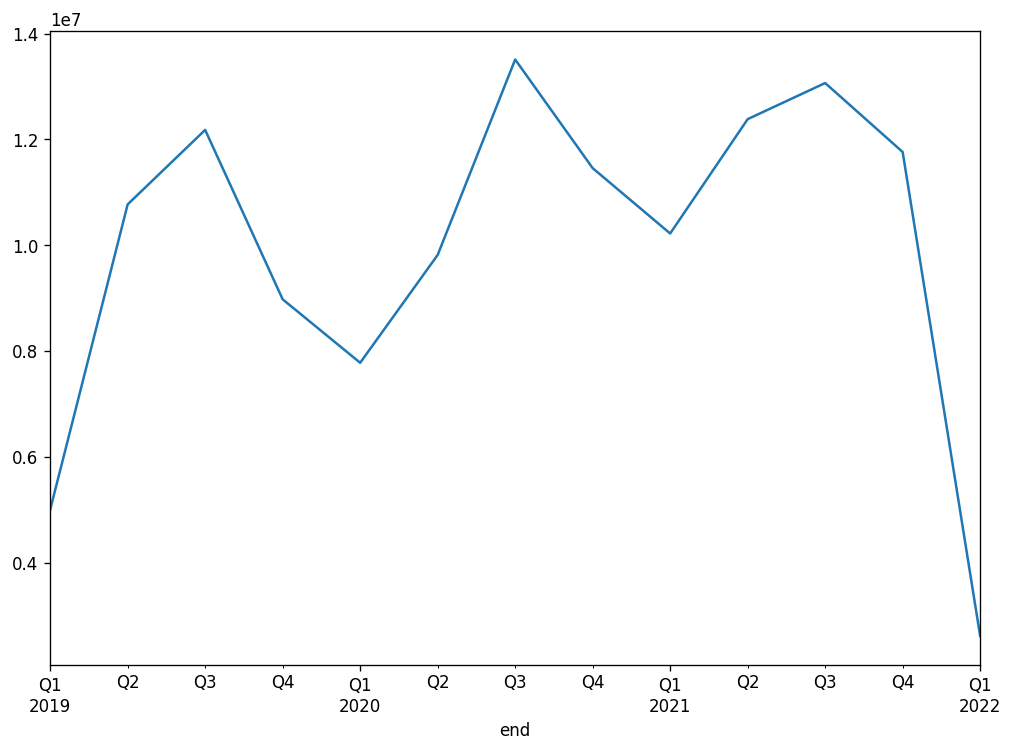

In [31]:
power_data_west_qtly['demand'].plot()

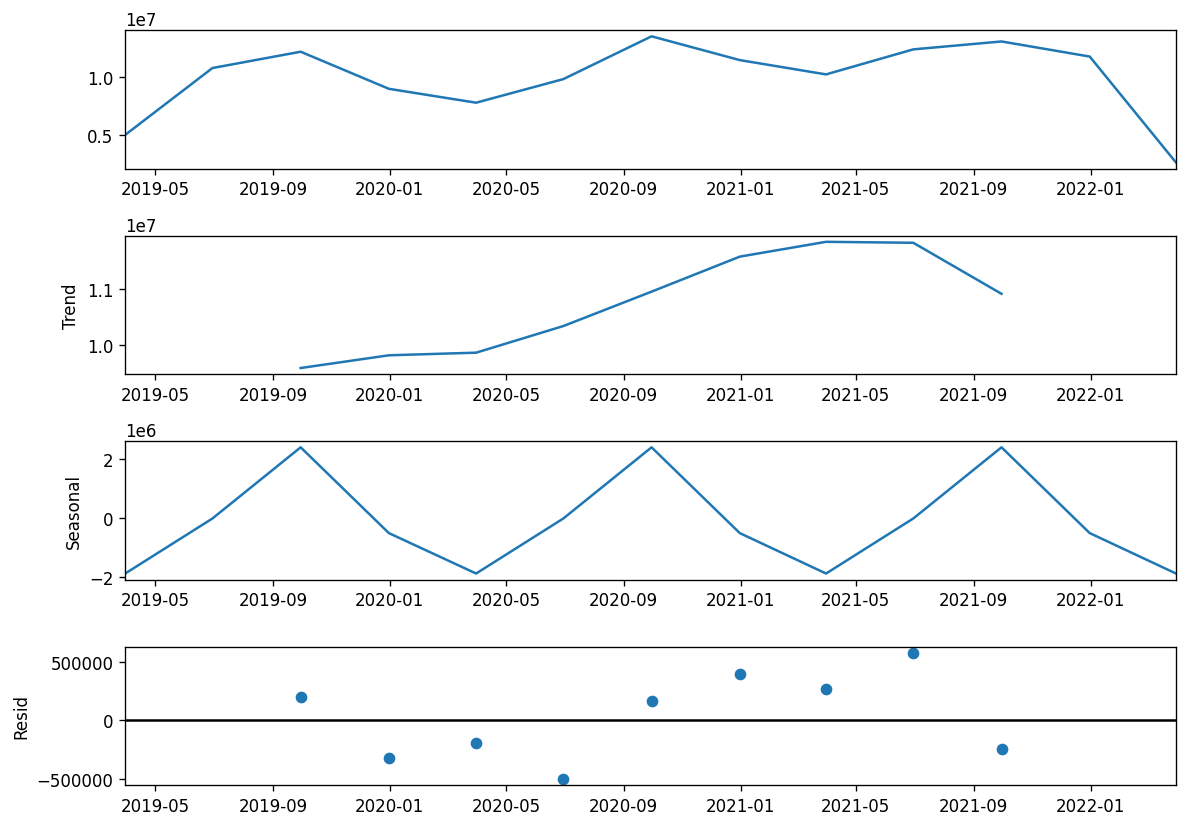

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(power_data_west_qtly, columns=['demand'])
result = seasonal_decompose(series, model='additive', period=4)
result.plot()
plt.show()

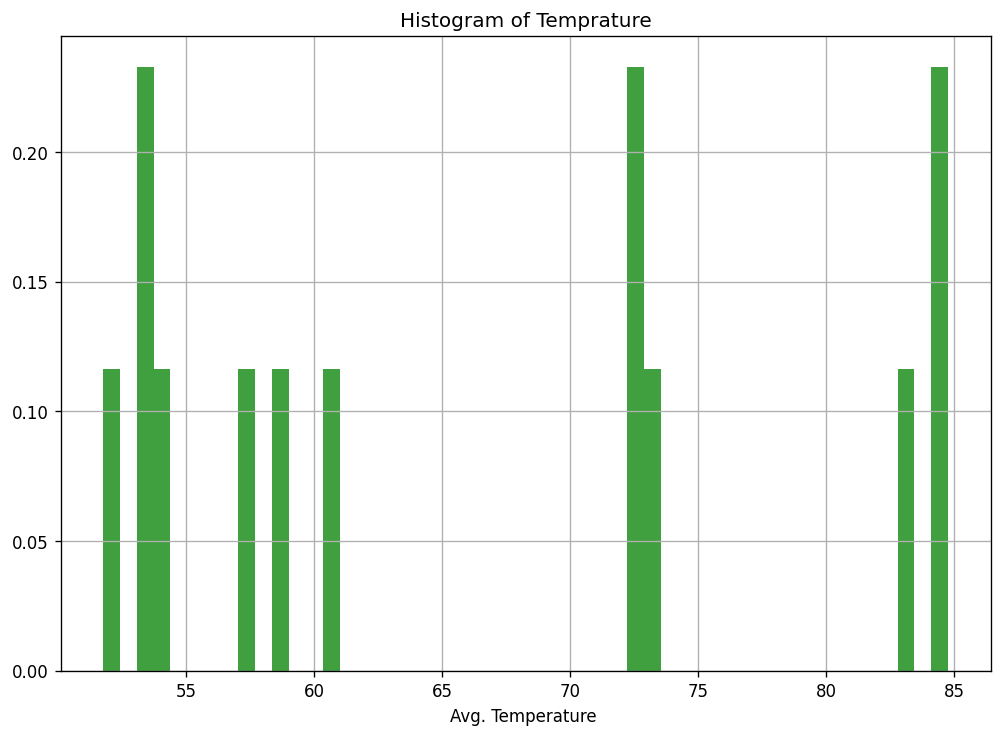

In [34]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_qtly['temp'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Avg. Temperature ')
plt.title('Histogram of Temprature')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

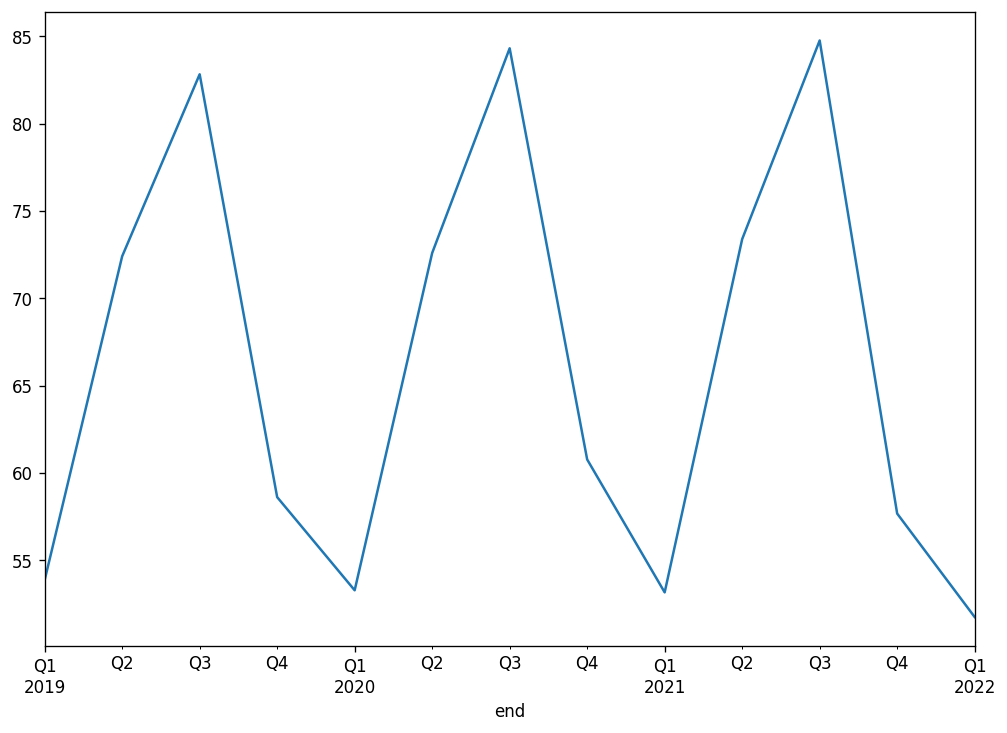

In [35]:
power_data_west_qtly['temp'].plot()

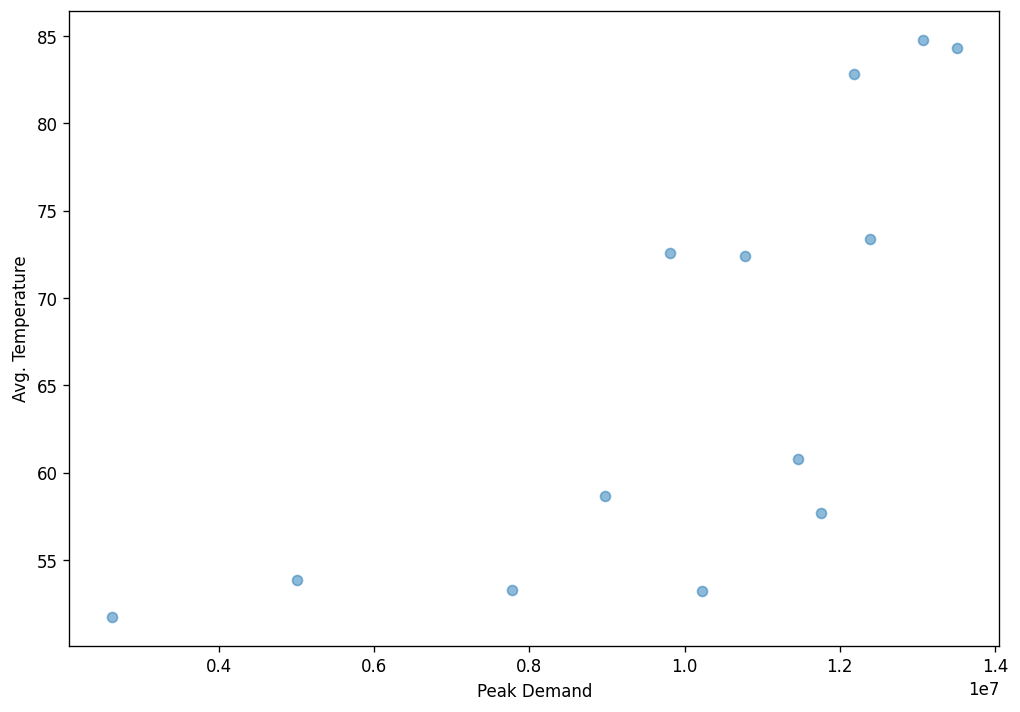

In [36]:
plt.scatter(power_data_west_qtly['demand'], power_data_west_monthly['temp'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

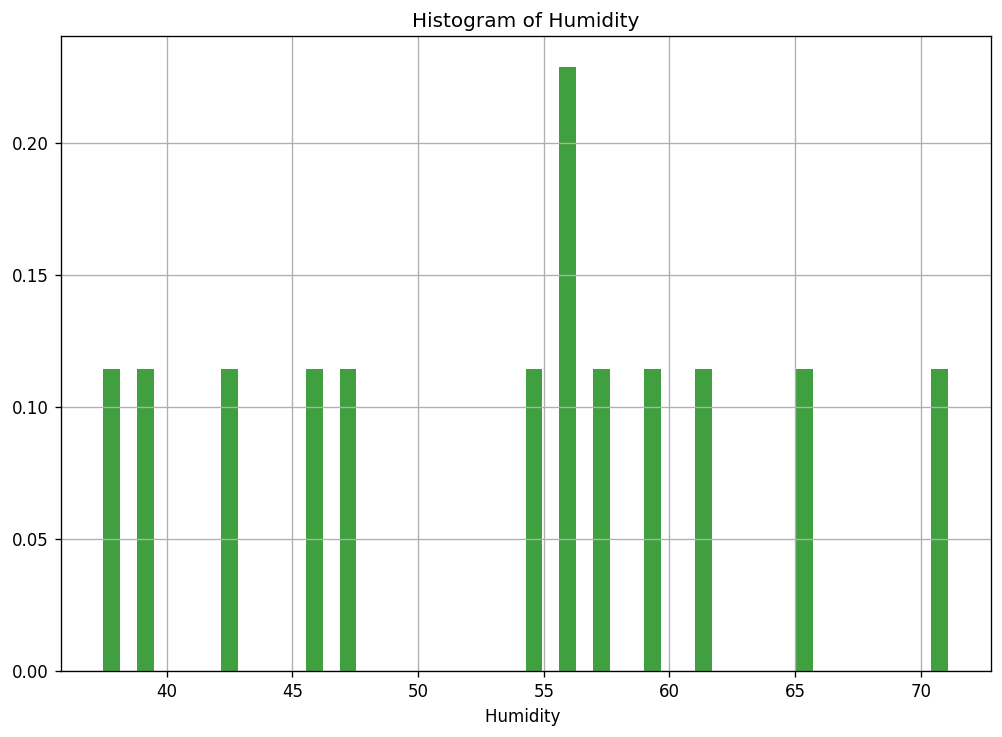

In [37]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_qtly['humidity'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Humidity ')
plt.title('Histogram of Humidity')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

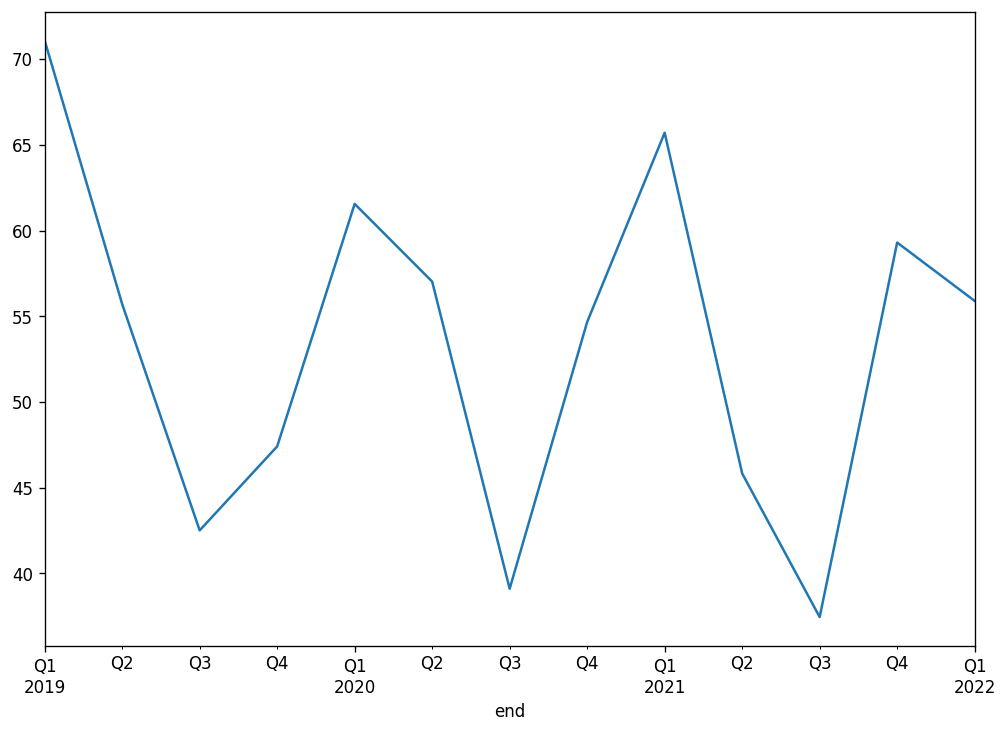

In [38]:
power_data_west_qtly['humidity'].plot()

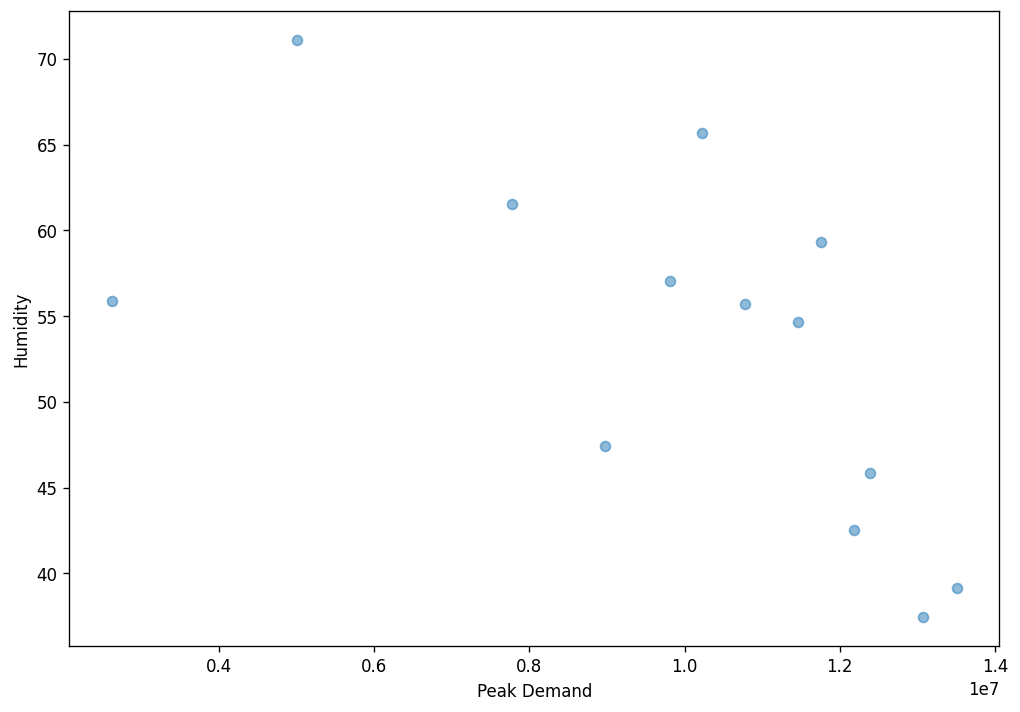

In [39]:
plt.scatter(power_data_west_qtly['demand'], power_data_west_monthly['humidity'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Humidity")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quarter', ylabel='demand'>

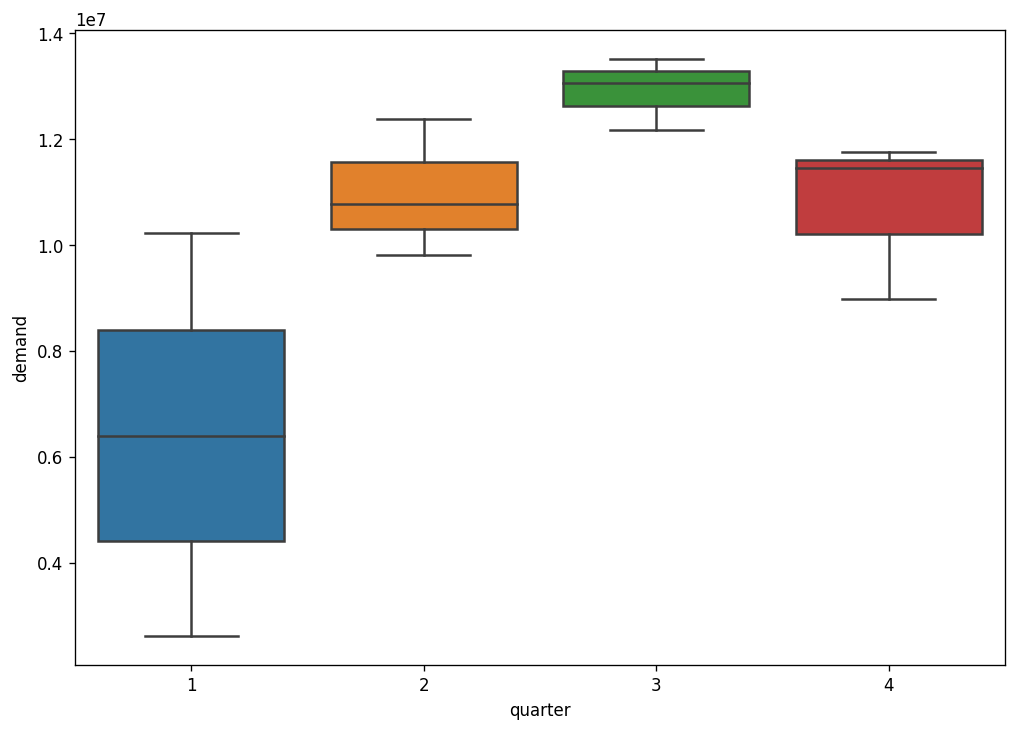

In [40]:
from seaborn import boxplot

boxplot(power_data_west_qtly['quarter'], power_data_west_qtly['demand'])